## Adult Dataset Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
          'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country',
          'salary']

In [27]:
data = pd.read_csv('./data/adult.data.csv', header=None, names=columns)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [54]:
# function to strip leading and trailing spaces in dataframe values
def transform(col_names, data):
    for i in col_names:
        if data[i][0] == 'str':
            data[i] = data[i].str.strip()
    return data

In [55]:
data = transform(columns,data)

In [5]:
data.shape

(32561, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


#### 1. How many men and women (sex feature) are represented in this dataset?

In [9]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

#### 2. What is the average age (age feature) of women?

In [29]:
data['sex'] = data['sex'].str.strip()

In [30]:
data[data['sex']=='Female']['age'].mean()

36.85823043357163

#### 3. What is the percentage of German citizens (native-country feature)?

In [31]:
data['native-country'] = data['native-country'].str.strip()

In [32]:
len(data[data['native-country']=='Germany']) / len(data) * 100

0.42074874850281013

#### 4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [33]:
data['salary'] = data['salary'].str.strip()

In [16]:
'''d = {'>50K': 1, '<=50K': 0}
data['salary'] = data['salary'].map(d)
data.head()'''

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [34]:
data.groupby(['salary'])['age'].agg([np.mean, np.std])

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


#### 6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [35]:
data['education'] = data['education'].str.strip()

In [36]:
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [37]:
at_least_hs = ['HS-grad','Bachelors','Masters','Some-college','Assoc-acdm','Assoc-voc','Doctorate','Prof-school']

In [38]:
lt_hs = ['11th','9th','7th-8th','5th-6th','10th','1st-4th', 'Preschool','12th']

In [39]:
x = dict.fromkeys(at_least_hs, 'at_least_hs')
data['education'] = data['education'].replace(x)

In [40]:
y = dict.fromkeys(lt_hs, 'lt_hs')
data['education'] = data['education'].replace(y)

In [41]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,at_least_hs,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,at_least_hs,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,at_least_hs,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,lt_hs,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,at_least_hs,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [42]:
pd.crosstab(data['salary'],data['education'])

education,at_least_hs,lt_hs
salary,,
<=50K,20711,4009
>50K,7597,244


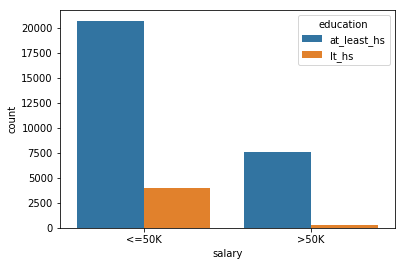

In [44]:
sns.countplot(x='salary', hue='education', data=data)

#### 7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [47]:
data.groupby(['race'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27816.0,38.769881,13.782306,17.0,28.0,37.0,48.0,90.0


In [48]:
data.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [49]:
data.groupby(['sex'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21790.0,39.433547,13.370630,17.0,29.0,38.0,48.0,90.0


#### 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [50]:
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [52]:
data['marital-status'] = data['marital-status'].str.strip()

In [53]:
married = ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']
z = dict.fromkeys(married, 'married')
data['marital-status'] = data['marital-status'].replace(z)

In [63]:
bachelors = ['Divorced','Never-married','Separated','Widowed']
a = dict.fromkeys(bachelors, 'bachelor')
data['marital-status'] = data['marital-status'].replace(a)

In [64]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,at_least_hs,13,bachelor,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,at_least_hs,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,at_least_hs,9,bachelor,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,lt_hs,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,at_least_hs,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [66]:
pd.crosstab(data['salary'], data['marital-status'])

marital-status,bachelor,married
salary,,
<=50K,16039,8681
>50K,1105,6736


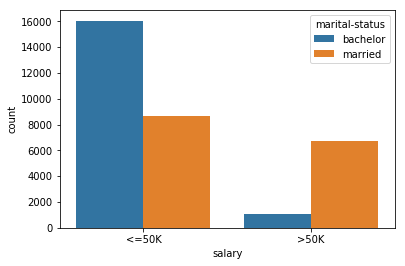

In [67]:
sns.countplot(x='salary', hue='marital-status', data=data)

#### 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [69]:
max_hrs = data['hours-per-week'].max()
max_hrs

99

In [73]:
max_hrs_df = data[data['hours-per-week'] == max_hrs]
max_hrs_df['hours-per-week'].count()

85

In [75]:
max_hrs_df['salary'].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

#### 10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

In [77]:
max_salary = data[data['salary'] == '>50K']
min_salary = data[data['salary'] == '<=50K']

In [78]:
max_salary.groupby(['native-country'])['hours-per-week'].mean()

native-country
?                     45.547945
Cambodia              40.000000
Canada                45.641026
China                 38.900000
Columbia              50.000000
Cuba                  42.440000
Dominican-Republic    47.000000
Ecuador               48.750000
El-Salvador           45.000000
England               44.533333
France                50.750000
Germany               44.977273
Greece                50.625000
Guatemala             36.666667
Haiti                 42.750000
Honduras              60.000000
Hong                  45.000000
Hungary               50.000000
India                 46.475000
Iran                  47.500000
Ireland               48.000000
Italy                 45.400000
Jamaica               41.100000
Japan                 47.958333
Laos                  40.000000
Mexico                46.575758
Nicaragua             37.500000
Peru                  40.000000
Philippines           43.032787
Poland                39.000000
Portugal              41.

In [79]:
min_salary.groupby(['native-country'])['hours-per-week'].mean()

native-country
?                             40.164760
Cambodia                      41.416667
Canada                        37.914634
China                         37.381818
Columbia                      38.684211
Cuba                          37.985714
Dominican-Republic            42.338235
Ecuador                       38.041667
El-Salvador                   36.030928
England                       40.483333
France                        41.058824
Germany                       39.139785
Greece                        41.809524
Guatemala                     39.360656
Haiti                         36.325000
Holand-Netherlands            40.000000
Honduras                      34.333333
Hong                          39.142857
Hungary                       31.300000
India                         38.233333
Iran                          41.440000
Ireland                       40.947368
Italy                         39.625000
Jamaica                       38.239437
Japan                    

In [81]:
data['native-country'] = data['native-country'].str.strip()

In [82]:
data[data['native-country'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,at_least_hs,11,married,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,at_least_hs,10,married,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,at_least_hs,9,bachelor,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,lt_hs,4,married,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,at_least_hs,9,married,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
245,56,Private,203580,at_least_hs,9,married,Adm-clerical,Husband,White,Male,0,0,35,?,<=50K
249,45,Private,153141,at_least_hs,9,married,Adm-clerical,Husband,White,Male,0,0,40,?,<=50K
297,39,?,157443,at_least_hs,14,married,?,Wife,Asian-Pac-Islander,Female,3464,0,40,?,<=50K
393,34,State-gov,98101,at_least_hs,13,married,Exec-managerial,Husband,White,Male,7688,0,45,?,>50K
453,42,Private,197583,at_least_hs,12,married,Exec-managerial,Husband,Black,Male,0,0,40,?,>50K
